In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, json

In [22]:
df = []

for path in os.listdir('backup'):
    with open(f'backup/{path}/info.json', 'r', encoding='utf-8') as file:
        data = json.loads(file.read())
    
    df.append(data)

df = pd.DataFrame(df)
df    

,model,params,K_CV,results,padronization
0,decision_tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",5,"{'accuracy': 0.7673385110867368, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ..."
1,knn,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",5,"{'accuracy': 0.7807231716562358, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ..."
2,naive_bayes,"{'priors': None, 'var_smoothing': 1e-09}",5,"{'accuracy': 0.7610111102598017, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ..."
3,gradient_boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",5,"{'accuracy': 0.7912818804170164, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ..."
4,logistic_regression,"{'C': 0.1, 'class_weight': None, 'dual': False...",5,"{'accuracy': 0.7918356157386498, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ..."
5,svm,"{'C': 1, 'break_ties': False, 'cache_size': 20...",5,"{'accuracy': 0.7843013662171755, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ..."
6,random_forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",5,"{'accuracy': 0.7980734812192185, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ..."


In [23]:
df = pd.concat([df, pd.json_normalize(df.results)], axis=1)
df

,model,params,K_CV,results,padronization,accuracy,precision,recall,specificity,auc
0,decision_tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",5,"{'accuracy': 0.7673385110867368, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.767339,0.577000,0.469737,0.874843,0.767020
1,knn,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",5,"{'accuracy': 0.7807231716562358, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.780723,0.612643,0.473837,0.891579,0.796823
2,naive_bayes,"{'priors': None, 'var_smoothing': 1e-09}",5,"{'accuracy': 0.7610111102598017, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.761011,0.545548,0.598147,0.819843,0.803415
3,gradient_boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",5,"{'accuracy': 0.7912818804170164, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.791282,0.663153,0.436028,0.919611,0.826929
4,logistic_regression,"{'C': 0.1, 'class_weight': None, 'dual': False...",5,"{'accuracy': 0.7918356157386498, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.791836,0.650954,0.466042,0.909522,0.821207
5,svm,"{'C': 1, 'break_ties': False, 'cache_size': 20...",5,"{'accuracy': 0.7843013662171755, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.784301,0.617539,0.493097,0.889493,0.812806
6,random_forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",5,"{'accuracy': 0.7980734812192185, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.798073,0.670034,0.472085,0.915829,0.827705


In [24]:
df = df.sort_values(by='auc', ascending=False)
df

,model,params,K_CV,results,padronization,accuracy,precision,recall,specificity,auc
6,random_forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",5,"{'accuracy': 0.7980734812192185, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.798073,0.670034,0.472085,0.915829,0.827705
3,gradient_boosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",5,"{'accuracy': 0.7912818804170164, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.791282,0.663153,0.436028,0.919611,0.826929
4,logistic_regression,"{'C': 0.1, 'class_weight': None, 'dual': False...",5,"{'accuracy': 0.7918356157386498, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.791836,0.650954,0.466042,0.909522,0.821207
5,svm,"{'C': 1, 'break_ties': False, 'cache_size': 20...",5,"{'accuracy': 0.7843013662171755, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.784301,0.617539,0.493097,0.889493,0.812806
2,naive_bayes,"{'priors': None, 'var_smoothing': 1e-09}",5,"{'accuracy': 0.7610111102598017, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.761011,0.545548,0.598147,0.819843,0.803415
1,knn,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",5,"{'accuracy': 0.7807231716562358, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.780723,0.612643,0.473837,0.891579,0.796823
0,decision_tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",5,"{'accuracy': 0.7673385110867368, 'precision': ...","{'tenure': {'mean': 32.37114865824223, 'std': ...",0.767339,0.577000,0.469737,0.874843,0.767020


Text(0, 0.5, 'AUC')

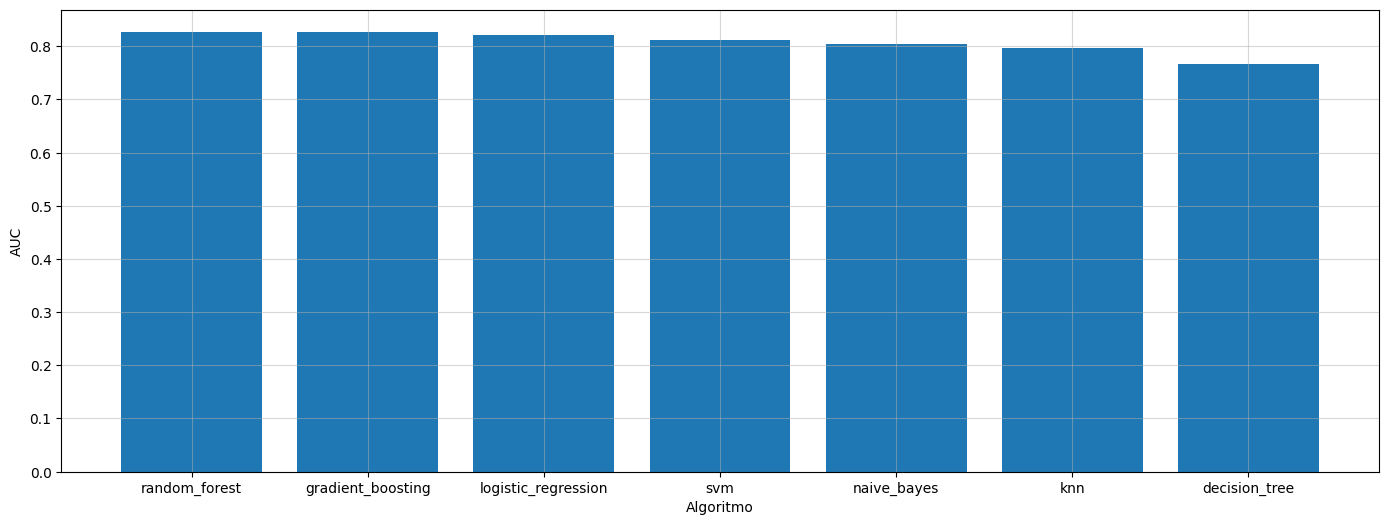

In [26]:
plt.figure(figsize=(17, 6))
plt.bar(df.model, df.auc)
plt.grid(alpha=0.5)
plt.xlabel('Algoritmo'); plt.ylabel('AUC')